<a href="https://colab.research.google.com/github/Awiity/mswzadani/blob/main/uloha3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

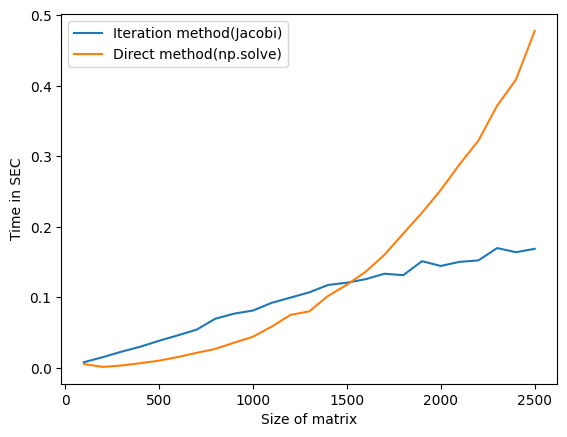

In [40]:
from scipy import linalg
import scipy
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi(A, b, N, x = None): #  https://en.wikipedia.org/wiki/Jacobi_method
  x = np.zeros_like(b)
  for it_count in range(N):

      x_new = np.zeros_like(x)

      for i in range(A.shape[0]):
          s1 = np.dot(A[i, :i], x[:i])
          s2 = np.dot(A[i, i + 1:], x[i + 1:])
          x_new[i] = (b[i] - s1 - s2) / A[i, i]
          if x_new[i] == x_new[i-1]:
            break

      if np.allclose(x, x_new, atol=1e-10, rtol=0.):
          break

      x = x_new

#inicializace matric
matrix_size = np.arange(100, 2500+100, 100)
timeDirect = []
timeIterat = []

for i in matrix_size:
  matrix = np.random.rand(i, i)
  b = np.random.rand(i)

  #Přímá metoda.
  timeStart = time.time()
  x = linalg.solve(matrix, b)
  timeEnd = time.time()
  timeDirect.append(timeEnd-timeStart)

  #Iterační metoda Jacobi
  timeStart = time.time()
  x_i = jacobi(matrix, b, 10)
  #x_iterative, exit_code = scipy.sparse.linalg.cg(matrix, b)
  timeEnd = time.time()
  timeIterat.append(timeEnd - timeStart)
  #print(x,'\n', x_i)


plt.plot(matrix_size, timeIterat, '-', label="Iteration method(Jacobi)")
plt.plot(matrix_size, timeDirect, '-', label="Direct method(np.solve)")
plt.xlabel("Size of matrix")
plt.ylabel("Time in SEC")
plt.legend()
plt.show()



